In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from googleapiclient.discovery import build
from dotenv import load_dotenv
from channel_ID import CHANNEL_ID

import warnings
warnings.filterwarnings('ignore')

In [2]:
## load enviroment variables from the .env files
load_dotenv()

True

In [3]:
## get the api key from the .env file
api_key = os.getenv("api_key")

In [4]:
## create a youtube api client
youtube = build('youtube', 'v3', developerKey=api_key)

In [5]:
## function to fetch the channel data for a given channel id and youtube api key

def channel_data(api_key, channel_id):
    all_data = []

    request = youtube.channels().list(
        part = 'snippet, contentDetails, statistics',
        id = ','.join(channel_id)
    )
    response = request.execute()
    for i in range(len(response['items'])):
        data = dict(channel_title = response['items'][i]['snippet']['title'],
                    created_date = response['items'][i]['snippet']['publishedAt'],
                    subscribers = response['items'][i]['statistics']['subscriberCount'],
                    total_videos = response['items'][i]['statistics']['videoCount'],
                    total_views = response['items'][i]['statistics']['viewCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        
        all_data.append(data)

    return all_data

In [6]:
## Calling the function to get the channel data and store it in a variable

channel_stat = channel_data(api_key,CHANNEL_ID)

channel_stat


[{'channel_title': 'Siraj Raval',
  'created_date': '2016-01-02T00:54:12Z',
  'subscribers': '771000',
  'total_videos': '476',
  'total_views': '51252229',
  'playlist_id': 'UUWN3xxRkmTPmbKwht9FuE5A'},
 {'channel_title': 'Two Minute Papers',
  'created_date': '2006-08-18T00:05:41Z',
  'subscribers': '1610000',
  'total_videos': '946',
  'total_views': '148912347',
  'playlist_id': 'UUbfYPyITQ-7l4upoX8nvctg'},
 {'channel_title': 'sentdex',
  'created_date': '2012-12-16T20:49:11Z',
  'subscribers': '1380000',
  'total_videos': '1255',
  'total_views': '116768491',
  'playlist_id': 'UUfzlCWGWYyIQ0aLC5w48gBQ'},
 {'channel_title': 'Krish Naik',
  'created_date': '2012-02-11T04:05:06Z',
  'subscribers': '1100000',
  'total_videos': '1980',
  'total_views': '111448947',
  'playlist_id': 'UUNU_lfiiWBdtULKOw6X0Dig'},
 {'channel_title': 'Simplilearn',
  'created_date': '2009-10-29T07:21:23Z',
  'subscribers': '4790000',
  'total_videos': '8664',
  'total_views': '414065017',
  'playlist_id': 'U

In [7]:
## Coverting the channel data to a pandas dataframe

channel_stat_df = pd.DataFrame(channel_stat)

In [8]:
## checking the first five rows of the datafrmae
channel_stat_df.head()

,channel_title,created_date,subscribers,total_videos,total_views,playlist_id
0,Siraj Raval,2016-01-02T00:54:12Z,771000,476,51252229,UUWN3xxRkmTPmbKwht9FuE5A
1,Two Minute Papers,2006-08-18T00:05:41Z,1610000,946,148912347,UUbfYPyITQ-7l4upoX8nvctg
2,sentdex,2012-12-16T20:49:11Z,1380000,1255,116768491,UUfzlCWGWYyIQ0aLC5w48gBQ
3,Krish Naik,2012-02-11T04:05:06Z,1100000,1980,111448947,UUNU_lfiiWBdtULKOw6X0Dig
4,Simplilearn,2009-10-29T07:21:23Z,4790000,8664,414065017,UUsvqVGtbbyHaMoevxPAq9Fg


In [9]:
## checking the infomations of the columns

channel_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   channel_title  15 non-null     object
 1   created_date   15 non-null     object
 2   subscribers    15 non-null     object
 3   total_videos   15 non-null     object
 4   total_views    15 non-null     object
 5   playlist_id    15 non-null     object
dtypes: object(6)
memory usage: 848.0+ bytes


In [10]:
channel_stat_df['created_date'].head()

0    2016-01-02T00:54:12Z
1    2006-08-18T00:05:41Z
2    2012-12-16T20:49:11Z
3    2012-02-11T04:05:06Z
4    2009-10-29T07:21:23Z
Name: created_date, dtype: object

In [11]:
## changing the date column to datetime format

## Dates are in ISO8601 format (like "2022-09-14T07:54:45.021008Z")
## "2022-09-14T07:54:45.021008Z" includes fractional seconds (.021008) and a "Z" to indicate UTC.

channel_stat_df['created_date'] = pd.to_datetime(channel_stat_df['created_date'], format='ISO8601').dt.date

In [12]:
channel_stat_df.head()

,channel_title,created_date,subscribers,total_videos,total_views,playlist_id
0,Siraj Raval,2016-01-02,771000,476,51252229,UUWN3xxRkmTPmbKwht9FuE5A
1,Two Minute Papers,2006-08-18,1610000,946,148912347,UUbfYPyITQ-7l4upoX8nvctg
2,sentdex,2012-12-16,1380000,1255,116768491,UUfzlCWGWYyIQ0aLC5w48gBQ
3,Krish Naik,2012-02-11,1100000,1980,111448947,UUNU_lfiiWBdtULKOw6X0Dig
4,Simplilearn,2009-10-29,4790000,8664,414065017,UUsvqVGtbbyHaMoevxPAq9Fg


In [13]:
## Converting the subscriber, total_videos and total_views columns to integer data type

channel_stat_df['subscribers'] = channel_stat_df['subscribers'].astype(int)
channel_stat_df['total_videos'] = channel_stat_df['total_videos'].astype(int)
channel_stat_df['total_views'] = channel_stat_df['total_views'].astype(int)

In [14]:
## Creating a new column year to store the year of the channel creation 

channel_stat_df['year'] = pd.to_datetime(channel_stat_df['created_date']).dt.year

In [15]:
numerical_data = channel_stat_df[['subscribers','total_videos','total_views','year']]

correlation = numerical_data.corr()
correlation

,subscribers,total_videos,total_views,year
subscribers,1.000000,0.436680,0.969250,-0.035261
total_videos,0.436680,1.000000,0.425497,-0.259035
total_views,0.969250,0.425497,1.000000,0.033311
year,-0.035261,-0.259035,0.033311,1.000000


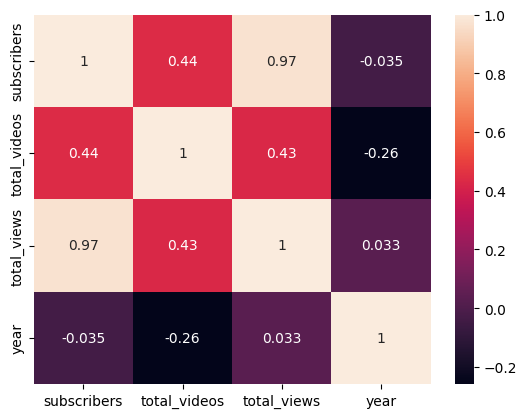

In [16]:
sns.heatmap(correlation, annot=True)
plt.show()

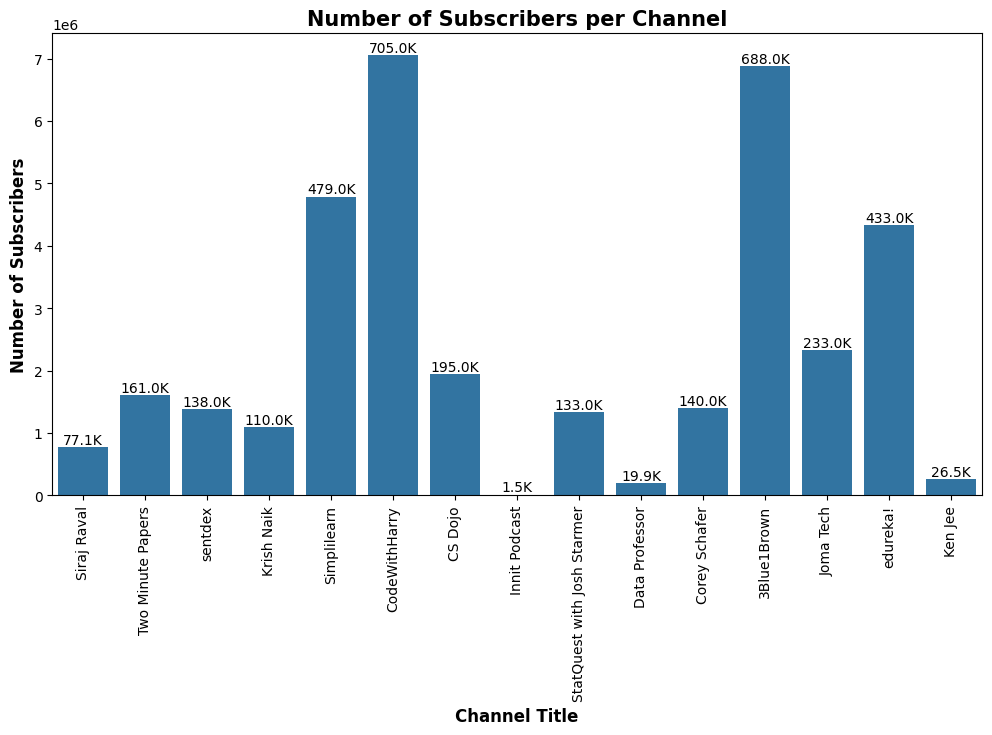

In [17]:
## number of subecribers per channel

plt.figure(figsize=(12,6))
ax = sns.barplot(x='channel_title', y='subscribers', data=channel_stat_df)
for p in ax.patches:
    label = f'{p.get_height() / 10000:.1f}K'
    ax.annotate(label, 
                (p.get_x()+ p.get_width()/2., p.get_height()), ha='center', 
                va='center', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Number of Subscribers per Channel', fontsize=15, fontweight='bold')
plt.xlabel('Channel Title', fontsize=12, fontweight='bold')
plt.ylabel('Number of Subscribers', fontsize=12, fontweight='bold')
plt.show()

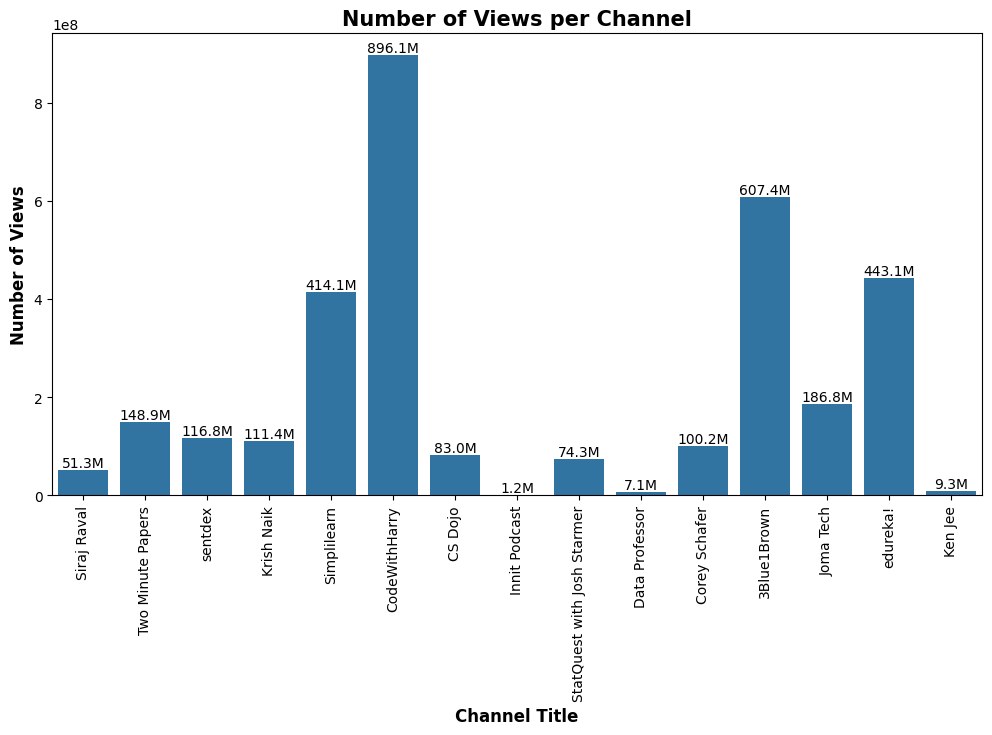

In [18]:
 ## Number of views per channel

plt.figure(figsize=(12,6))
ax = sns.barplot(x='channel_title', y='total_views', data=channel_stat_df)
for p in ax.patches:
    label = f'{p.get_height() / 1000000:.1f}M'
    ax.annotate(label, 
                (p.get_x()+ p.get_width()/2., p.get_height()), ha='center', 
                va='center', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Number of Views per Channel', fontsize=15, fontweight='bold')
plt.xlabel('Channel Title', fontsize=12, fontweight='bold')
plt.ylabel('Number of Views', fontsize=12, fontweight='bold')
plt.show()

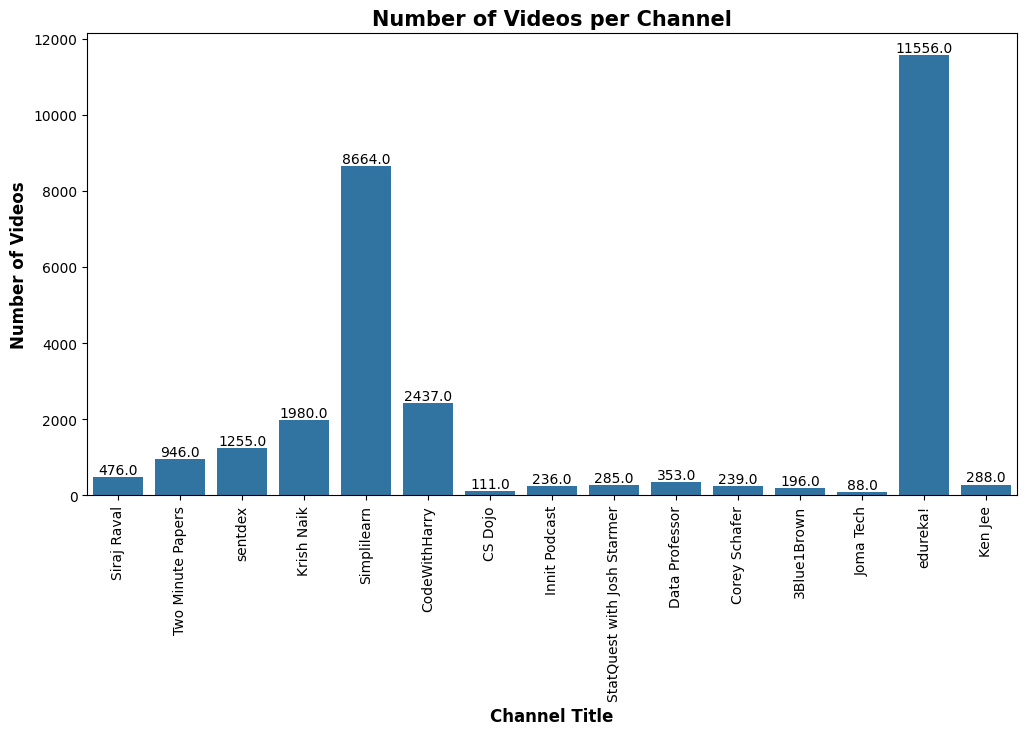

In [19]:
## number of videos per channel

plt.figure(figsize=(12,6))
ax = sns.barplot(x='channel_title', y='total_videos', data=channel_stat_df)
for p in ax.patches:
    label = f'{p.get_height()}'
    ax.annotate(label, 
                (p.get_x()+ p.get_width()/2., p.get_height()), ha='center', 
                va='center', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Number of Videos per Channel', fontsize=15, fontweight='bold')
plt.xlabel('Channel Title', fontsize=12, fontweight='bold')
plt.ylabel('Number of Videos', fontsize=12, fontweight='bold')  
plt.show()  


In [20]:
channel_stat_df.head()

,channel_title,created_date,subscribers,total_videos,total_views,playlist_id,year
0,Siraj Raval,2016-01-02,771000,476,51252229,UUWN3xxRkmTPmbKwht9FuE5A,2016
1,Two Minute Papers,2006-08-18,1610000,946,148912347,UUbfYPyITQ-7l4upoX8nvctg,2006
2,sentdex,2012-12-16,1380000,1255,116768491,UUfzlCWGWYyIQ0aLC5w48gBQ,2012
3,Krish Naik,2012-02-11,1100000,1980,111448947,UUNU_lfiiWBdtULKOw6X0Dig,2012
4,Simplilearn,2009-10-29,4790000,8664,414065017,UUsvqVGtbbyHaMoevxPAq9Fg,2009


In [21]:
harry = channel_stat_df['channel_title'] == "CodeWithHarry"

In [22]:
playlist_id = channel_stat_df[harry]['playlist_id'].iloc[0]

playlist_id

'UUeVMnSShP_Iviwkknt83cww'

In [29]:
def get_video_id(youtube, playlist_id):
    """
    Extracts all video IDs from a given YouTube playlist.

    Args:
        youtube: An authorized YouTube API client instance.
        playlist_id: The ID of the playlist from which to extract video IDs.

    Returns:
        A list of video IDs in the playlist.
    """
    video_id = []
    next_page_token = None

    while True:
        # Request the playlist items with optional next_page_token
        request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=playlist_id,
            maxResults=50,
            pageToken=next_page_token
        )
        response = request.execute()

        # Append video IDs to the list
        video_id.extend(item['contentDetails']['videoId'] for item in response['items'])

        # Check for next page token
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break

    return video_id


In [30]:
## create a youtube api client
youtube = build('youtube', 'v3', developerKey=api_key)

In [31]:
video_ids = get_video_id(youtube, playlist_id)

In [36]:
def get_video_details(youtube, video_ids):
    """
    Extracts details (title, published date, views, likes, and comments) from a list of video IDs.

    Args:
        youtube: An authorized YouTube API client instance.
        video_ids: A list of video IDs to retrieve details for.

    Returns:
        A list of dictionaries containing details for each video.
    """
    all_data = []
    # YouTube API allows fetching details for up to 50 videos at a time
    batch_size = 50

    for i in range(0, len(video_ids), batch_size):
        # Batch the video IDs for the current API request
        batch_ids = video_ids[i:i + batch_size]

        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(batch_ids)  # Join video IDs as a comma-separated string
        )
        response = request.execute()

        for item in response.get('items', []):  # Safely handle cases where 'items' might be missing
            data = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'published_date': item['snippet']['publishedAt'],
                'views': item['statistics'].get('viewCount', 0),
                'likes': item['statistics'].get('likeCount', 0),
                'comments': item['statistics'].get('commentCount', 0)
            }
            all_data.append(data)

    return all_data


In [37]:
video_details = get_video_details(youtube, video_ids)

In [38]:
## Converting the video details to a pandas dataframe

video_details_df = pd.DataFrame(video_details)

In [39]:
video_details_df.head()

,video_id,title,published_date,views,likes,comments
0,X8BYu3dMKf0,Web Developer Roadmap (2025) - Everything is C...,2025-01-21T04:06:32Z,312872,19014,1207
1,kqU2O7Kw_c8,Creating a Wordpress Travel Blog in less than ...,2025-01-13T17:48:03Z,28401,1174,206
2,5Oy8tVY8BNs,"Let's build a Chat app using Clerk, Stream & N...",2025-01-10T14:30:05Z,35268,1613,291
3,0HyIda5eub8,Learn Coding & Get a Job (in 2025) 🔥,2025-01-08T13:24:58Z,795495,40901,2254
4,s4pbgqUIMzs,Upgraded to Google 🔥,2025-01-01T15:17:23Z,66372,4568,79


In [40]:
video_details_df.shape

(2438, 6)

In [41]:
video_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        2438 non-null   object
 1   title           2438 non-null   object
 2   published_date  2438 non-null   object
 3   views           2438 non-null   object
 4   likes           2438 non-null   object
 5   comments        2438 non-null   object
dtypes: object(6)
memory usage: 114.4+ KB


In [42]:
video_details_df = video_details_df.astype({'views': int, 'likes': int, 'comments': int})

In [44]:
video_details_df.describe()

,views,likes,comments
count,2.438000e+03,2438.000000,2438.000000
mean,3.677990e+05,13133.297785,878.352338
std,9.405679e+05,27535.201943,3605.776426
min,0.000000e+00,0.000000,0.000000
25%,6.491075e+04,2191.000000,144.000000
50%,1.517015e+05,5519.000000,298.000000
75%,3.421372e+05,13284.000000,675.750000
max,2.440899e+07,634177.000000,123074.000000


In [47]:
video_details_df.isnull().sum()

video_id          0
title             0
published_date    0
views             0
likes             0
comments          0
dtype: int64

In [65]:
# 'published_date' is in datetime format
video_details_df['published_date'] = pd.to_datetime(video_details_df['published_date'], errors='coerce')

In [66]:
video_details_df.head()

,video_id,title,published_date,views,likes,comments
0,X8BYu3dMKf0,Web Developer Roadmap (2025) - Everything is C...,2025-01-21,312872,19014,1207
1,kqU2O7Kw_c8,Creating a Wordpress Travel Blog in less than ...,2025-01-13,28401,1174,206
2,5Oy8tVY8BNs,"Let's build a Chat app using Clerk, Stream & N...",2025-01-10,35268,1613,291
3,0HyIda5eub8,Learn Coding & Get a Job (in 2025) 🔥,2025-01-08,795495,40901,2254
4,s4pbgqUIMzs,Upgraded to Google 🔥,2025-01-01,66372,4568,79


In [67]:
## average number of views, likes, and comments per video

average_views = video_details_df['views'].mean()
average_likes = video_details_df['likes'].mean()
average_comments = video_details_df['comments'].mean()

In [58]:
print(f"Average Views: {average_views:.2f}")
print(f"Average Likes: {average_likes:.2f}")
print(f"Average Comments: {average_comments:.2f}")


Average Views: 367799.05
Average Likes: 13133.30
Average Comments: 878.35


In [68]:
## Average number of views, likes, and comments per video in 2024
# Filter videos published in 2024
filter_2024 = video_details_df[video_details_df['published_date'].dt.year == 2024]
filter_2024

,video_id,title,published_date,views,likes,comments
5,mXZb9NytbmI,This is what happened in 2024...,2024-12-29,56388,4951,891
6,9ja99LqXQLg,Upcoming Products (Google Insider Reveals),2024-12-29,21233,1406,10
7,Jl4Mv3mwVX0,Security & Google 🔥,2024-12-27,47340,3455,29
8,WXqOc-oor-E,Two Weeks is what it takes...,2024-12-25,212688,15121,774
9,1XuyLPkFlZo,"Why use Google Workspace ft. Prakash, India Le...",2024-12-23,28426,1612,30
...,...,...,...,...,...,...
188,R11tvGM3nDY,Introduction to Express Js | Sigma Web Develop...,2024-01-05,108648,3845,580
189,C8qEifIlH_k,"🤑₹3,30,000 New Year Gift for Myself - Lifesty...",2024-01-03,244461,9725,983
190,BTcmvrCTyNg,Working with Files: fs and path Modules | Sigm...,2024-01-03,79554,2973,243
191,bU69doALJGU,CommonJs Vs EcmaScript Modules | Sigma Web Dev...,2024-01-02,110733,3676,411


In [69]:
# Calculate averages for views, likes, and comments
average_views = filter_2024['views'].astype(int).mean()
average_likes = filter_2024['likes'].astype(int).mean()
average_comments = filter_2024['comments'].astype(int).mean()

In [70]:
# Display the results
print(f"Average Views per Video in 2024: {average_views}")
print(f"Average Likes per Video in 2024: {average_likes}")
print(f"Average Comments per Video in 2024: {average_comments}")

Average Views per Video in 2024: 236913.31382978722
Average Likes per Video in 2024: 9914.239361702128
Average Comments per Video in 2024: 714.1329787234042


In [71]:
### Top 10 viedos in the channel
top10_videos = video_details_df.sort_values(by='views',
                                            ascending=False).head(10)

In [72]:
top10_videos

,video_id,title,published_date,views,likes,comments
1395,gfDE2a7MKjA,Python Tutorial For Beginners In Hindi (With N...,2020-09-24,24408987,634177,123074
1502,ZSPZob_1TOk,C Language Tutorial For Beginners In Hindi (Wi...,2020-07-28,18233067,419151,77055
1236,BsDoLVMnmZs,HTML Tutorial For Beginners In Hindi (With Not...,2021-03-17,13485288,335290,29120
1444,ntLJmHOJ0ME,Introduction to Java + Installing Java JDK and...,2020-08-30,9598548,170264,21722
1798,6mbwJ2xhgzM,"Introduction to HTML, CSS, JavaScript & How we...",2019-12-25,8174961,211512,16753
577,7wnove7K-ZQ,Introduction to Programming & Python | Python ...,2022-11-28,8014172,200115,26352
1761,j8nAHeVKL08,"Introduction to C++, Installing VS Code, g++ &...",2020-01-11,7194731,146595,15759
1589,hKB-YGF14SY,JavaScript Tutorial In Hindi,2020-05-16,7003438,197470,24780
1228,Edsxf_NBFrw,CSS Tutorial In Hindi (With Notes) 🔥,2021-04-27,6799665,133864,16934
1500,5_5oE5lgrhw,Introduction to Data Structures & Algorithms,2020-07-30,6538420,142068,6458


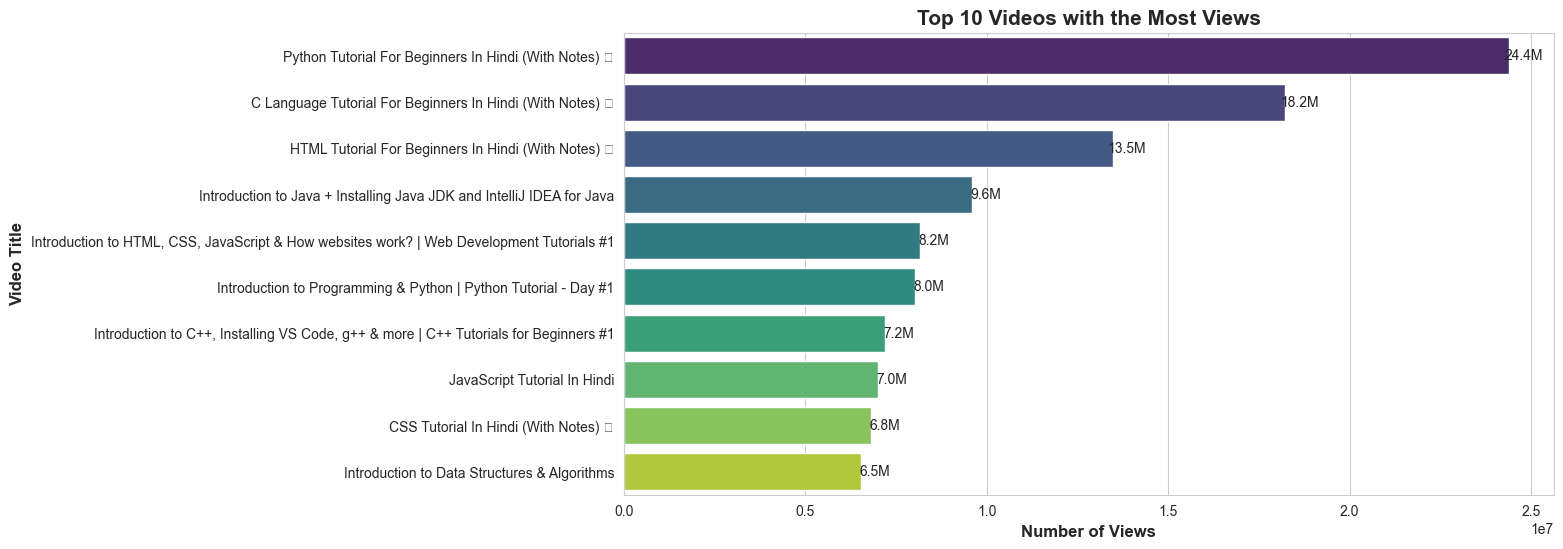

In [75]:
## Plotting the top 10 videos with the most views
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ax = sns.barplot(x='views', y='title', data=top10_videos, palette='viridis')
for p in ax.patches:
    ax.annotate(f"{p.get_width() / 1000000:.1f}M",
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')
plt.title('Top 10 Videos with the Most Views', fontsize=15, fontweight='bold')
plt.xlabel('Number of Views', fontsize=12, fontweight='bold')
plt.ylabel('Video Title', fontsize=12, fontweight='bold')
plt.show()
